In [7]:
from sympy import  *
x = var('x')

In [17]:
%matplotlib inline

In [8]:
p = x**5 + x**2 +1

Considereu el polinomi $p(x) = x^{5} + x^{2} + 1$.

#### Part 1
Sense fer cap càlcul i nomès a partir del teorema fonamental de l'àlgebra doneu fites del número d'arrels reals que té.

_Solució_: Un polinomi de grau 5 té sempre 5 arrels complexes (comptades amb multiplicitat). A més $p$ té coeficients reals, amb la qual cosa sabem que si $p(z)=0$, llavors també $p(\bar z) = 0$. Però llavors si $z$ no és una arrel real, $\bar z$ tampoc ho és, o sigui que el nombre d'arrels no reals ha de ser sempre parell.

Les oopcions són doncs:

* 1 arrel real (i 2 parells de complexes conjugades)
* 3 arrels reals (i 1 parell de complexes conjugades)
* 5 arrels reals (i cap parell de complexes conjugades)

#### Part 2
Trobeu les arrels complexes de la derivada.

_Solució_: Calculem-la:

In [9]:
dp = p.diff(x).factor()
dp

x*(5*x**3 + 2)

Una és zero, les altres surten d'escriu el segon factor com $5z^3=-2$, per tant $z=\sqrt[3]{-2/5}$.
Escrivim en polars $-2/5 = 2/5 \angle\pi$, i per tant $z = \sqrt[3]{2/5}\angle(\pi/3 + 2k\pi/3)$ per a $k=0,1,2$.

Observem que hi ha una altra arrel real: $z=\sqrt[3]{2/5}\angle\pi = -\sqrt[3]{2/5}$.

In [10]:
[(abs(r),arg(r)) for r in roots(dp, x)]

[(0, nan),
 (2**(1/3)*5**(2/3)/5, pi),
 (2**(1/3)*5**(1/6)*sqrt(5)/5, -pi/3),
 (2**(1/3)*5**(1/6)*sqrt(5)/5, pi/3)]

#### Part 3
Digueu quantes arrels reals té.

Observem que $\lim_{x\to+\infty}p(x)=+\infty$ i $\lim_{x\to-\infty}p(x)=-\infty$.
Això vol dir que per a $x$ prou positiva, sempre $p(x)>0$ i per a $x$ prou negativa sempre $p(x)<0$ i, llavors, pel
teorema de _Bolzano_ hi ha almenys una arrel real.

Els extrems relatius de la funció es donen quan $p'(x)=0$ i ja sabem de l'apartat d'abans que això passa a:

In [11]:
pcrics = sorted([r for r in roots(dp,x) if im(r) == 0])
pcrics

[-2**(1/3)*5**(2/3)/5, 0]

La segona derivada ens diu que el primer correspon a un màxim relatiu i $x=0$ a un mínim relatiu:

In [13]:
[p.diff(x,x).subs(x,r) for r in pcrics]

[-6, 2]

i els valors de $p$ en aquests punts són:

In [15]:
[float(p.subs(x,r)) for r in pcrics]

[1.3257301139913888, 1.0]

Això vol dir que $p$ té una arrel abans de $x=-\sqrt[3]{2/5}$ i fins aquell moment és creixent.
Des d'aquest punt fins a $x=0$ és estrictament decreixent, però encara positiva, per tant no hi ha cap arrel més.
A partir de $x=0$ és estrictament creixent i per tant $p(x)>1$ si $x>0$. O sigui que només hi ha una arrel.

#### Part 4
Interval fitat més gran on $p$ és injectiva

Al primer i tercer tram $p$ és estrictament creixent però els no són fitats.

En canvi el tram $[-\sqrt[3]{2/5}, 0]$ és fitat i $p$ estrictament decreixent, per tant injectiva.

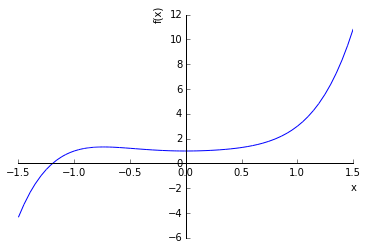

In [47]:
plot(p, (x,-1.5,1.5));

#### Part 5
Si volem aproximar $p$ amb un paràbola prop de $x=1$, quina hauria de ser? 

_Solució_: Haurà de ser el _polinomi de Taylor_ de grau 2 de $p$ al punt $a=1$:

In [19]:
tp = list(series(p,x,1,n=None))
t2 = sum(tp[:3])
t2

7*x + 11*(x - 1)**2 - 4

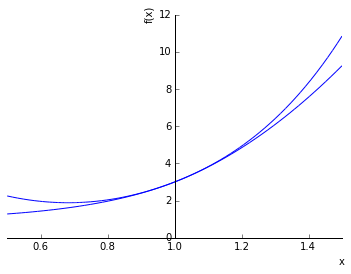

In [46]:
plot(p, t2, (x,0.5, 1.5));

#### Part 6
Doneu una fita de l'error per a $1/2<x<3/2$.

El _reste de Lagrange_ depén de la tercera derivada:

In [26]:
c = var('c', real=True)
from math import factorial
p.diff(x,x,x).subs(x,c)/factorial(3)*(x-1)**3

10*c**2*(x - 1)**3

Com que $c\in(1,x)$ i $x\in(1/2,3/2)$, deduïm que també $c\in(1/2,3/2)$, $c\mapsto c^2$ és una funció creixent en aquest tram, és a dir que el seu valor màxim és a $c=3/2$.
Per altra banda $|x-1|<1/2$, o sigui que l'eror màxim seria:

In [29]:
r32 = Rational(3,2)
_.subs({c: r32, x:r32})


45/16

#### Part 7
Trobeu un interval de mida 1 que contingui una arrel real de $p$. Calculeu-la amb un error màxim de 0.01

Sabem que l'arrel és abans de:

In [32]:
float(-(Rational(2,5))**Rational(1,3))

-0.7368062997280773

In [35]:
[p.subs(x,v) for v in (-2,-1,0)]

[-27, 1, 1]

A l'interval $[-2,-1]$ i ha l'arrel.
Bisectem aquest interval:

In [37]:
def bisect(f, iv):
    a,b = iv
    assert f(a) * f(b) < 0
    c = (a + b)/2
    if f (c) == 0:
        return c
    elif f(c) * f(a) < 0:
        return (a,c)
    else:
        return (c,b)

In [39]:
iv = (-2.,-1.)
while iv[1]-iv[0] >= 2e-2:
    iv = bisect(lambda t: p.subs(x,t), iv)
iv

(-1.203125, -1.1875)

Per tant donem el valor aproximat:

In [41]:
c = (iv[0]+ iv[1])/2; c

-1.1953125

In [43]:
p.subs(x, c), p.subs(x, c+1e-2)

(-0.0113262345839757, 0.0652433819639620)

Observem que entre $c$ i $c + 10^{-2}$, $p$ canvia de signe. Això vol dir que la veritable arrel està en aquest interval.